In [4]:
import pandas as pd

products_file = "C:\\Users\\DELL\\Downloads\\Products.csv"
customers_file = "C:\\Users\\DELL\\Downloads\\Customers.csv"
transactions_file = "C:\\Users\\DELL\\Downloads\\Transactions.csv"

products_df = pd.read_csv(products_file)
customers_df = pd.read_csv(customers_file)
transactions_df = pd.read_csv(transactions_file)

products_preview = products_df.head()
customers_preview = customers_df.head()
transactions_preview = transactions_df.head()

products_info = products_df.info()
customers_info = customers_df.info()
transactions_info = transactions_df.info()

products_preview, customers_preview, transactions_preview, products_info, customers_info, transactions_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(  ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

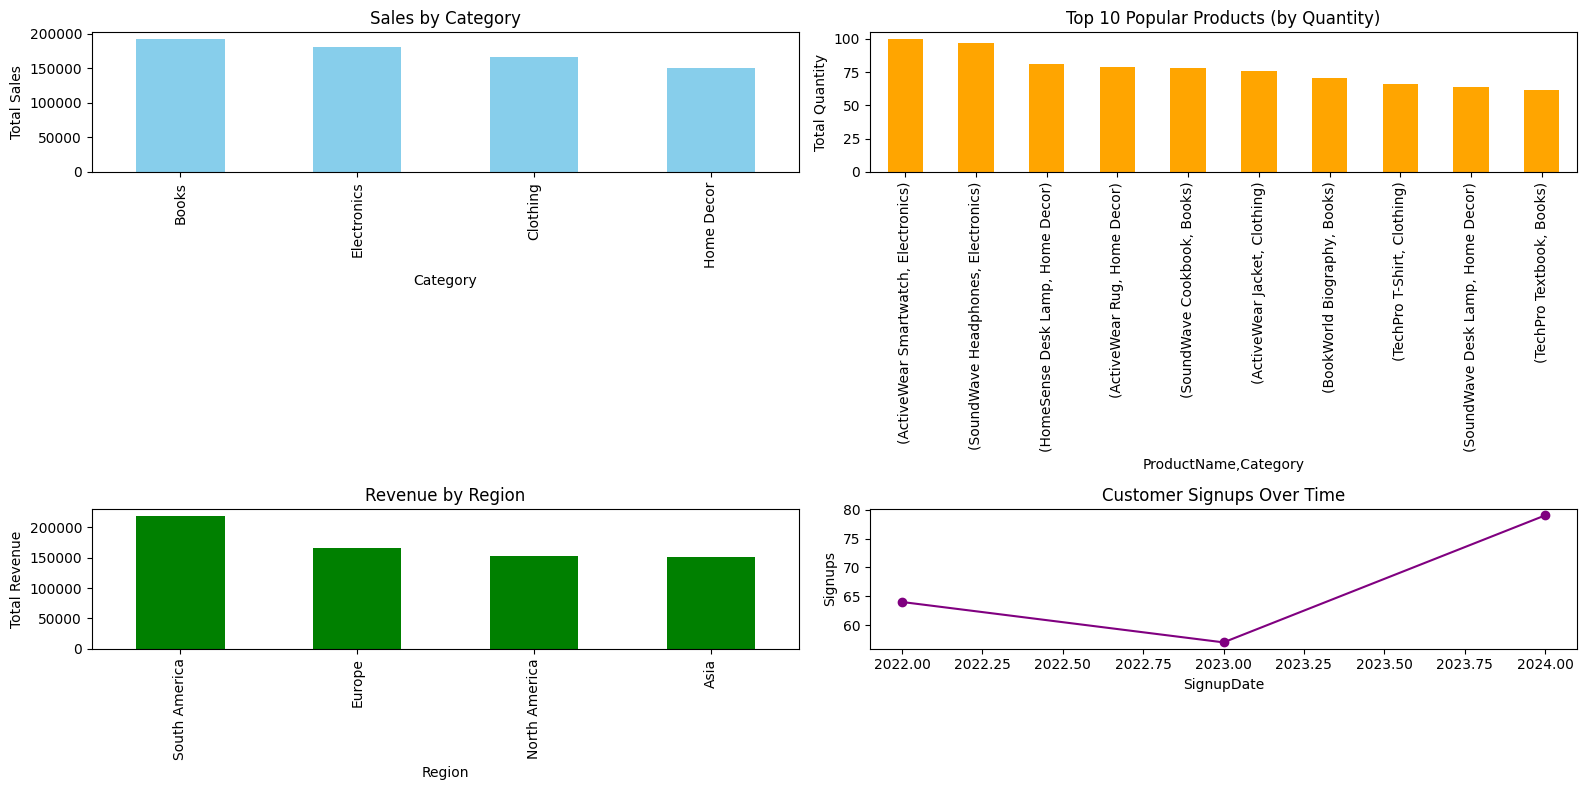

(                     TransactionDate     Quantity   TotalValue     Price_x  \
 count                           1000  1000.000000  1000.000000  1000.00000   
 mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
 min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
 25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
 50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
 75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
 max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
 std                              NaN     1.117981   493.144478   140.73639   
 
           Price_y                     SignupDate  
 count  1000.00000                           1000  
 mean    272.55407  2023-07-09 02:49:55.199999744  
 min      16.08000            2022-01-22 00:00:00  
 25%     147.95000            2022-09-17 12:00:00  
 50%     299.93000         

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

merged_df = transactions_df.merge(products_df, on="ProductID").merge(customers_df, on="CustomerID")

summary_stats = merged_df.describe()

sales_by_category = merged_df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)

popular_products = (
    merged_df.groupby(["ProductName", "Category"])["Quantity"].sum().sort_values(ascending=False).head(10)
)

revenue_by_region = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)

signup_trends = customers_df['SignupDate'].dt.year.value_counts().sort_index()

monthly_sales = merged_df.set_index("TransactionDate").resample("M")["TotalValue"].sum()

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sales_by_category.plot(kind="bar", color="skyblue", title="Sales by Category")
plt.ylabel("Total Sales")

plt.subplot(2, 2, 2)
popular_products.plot(kind="bar", color="orange", title="Top 10 Popular Products (by Quantity)")
plt.ylabel("Total Quantity")

plt.subplot(2, 2, 3)
revenue_by_region.plot(kind="bar", color="green", title="Revenue by Region")
plt.ylabel("Total Revenue")

plt.subplot(2, 2, 4)
signup_trends.plot(kind="line", marker="o", title="Customer Signups Over Time", color="purple")
plt.ylabel("Signups")

plt.tight_layout()
plt.show()

